# View the dataset

In [1]:
# importation
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# local
from FBResNet.myfunc import Physics
from FBResNet.main import FBRestNet
from FBResNet.model import MyModel
from FBResNet.pretreat import Export_Data

### Paramètres 

In [2]:
exp1 = FBRestNet(experimentation=Physics(20000,500,0.5,1), nb_blocks=20, noise = 0.1,\
                 folder = './', im_set="Set1",batch_size=[300,1],\
                 lr=1e-3, nb_epochs=[20,1])

# Create the dataset

In [3]:
train_set, val_set = exp1.CreateDataSet()

In [4]:
import pandas as pd

In [5]:
folder = './Datasets/Signals'

In [6]:
dfl  = pd.read_csv(folder+'/'+'data_lisse_trsf.csv', sep=',',header=None)
dfle = pd.read_csv(folder+'/'+'data_lisse.csv', sep=',',header=None)
dfb  = pd.read_csv(folder+'/'+'data_blurred.csv', sep=',',header=None)
dfbn = pd.read_csv(folder+'/'+'data_blurred_n.csv', sep=',',header=None)

In [7]:
fl = np.array(dfl)
fle = np.array(dfle)
fb = np.array(dfb)
fbn = np.array(dfbn)

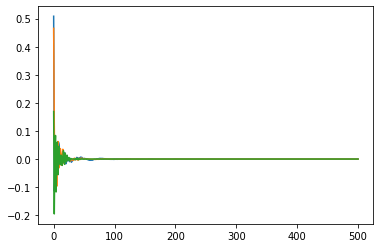

In [8]:
t = np.linspace(0,500,500)
plt.plot(t,fl[1])
plt.plot(t,fl[16])
plt.plot(t,fl[25])

In [9]:
from scipy.interpolate import interp1d
# interpolation
def reduce(f):
    t      = np.linspace(0,1,20000, endpoint=True)
    te     = np.linspace(0,1,500,endpoint=True)
    g      = interp1d(t,f)
    f_red  = g(te)
    return f_red

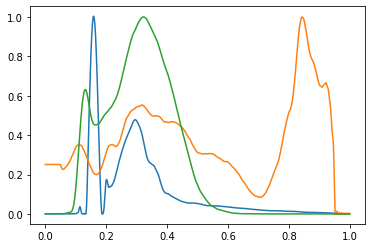

In [10]:
te = np.linspace(0,1,20000)
plt.plot(te,fle[12])
plt.plot(te,fle[30])
plt.plot(te,fle[252])

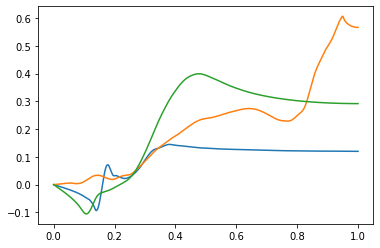

In [11]:
plt.plot(te,fb[12])
plt.plot(te,fb[30])
plt.plot(te,fb[252])

In [12]:
np.linalg.norm(fb[1])

58.23597319850119

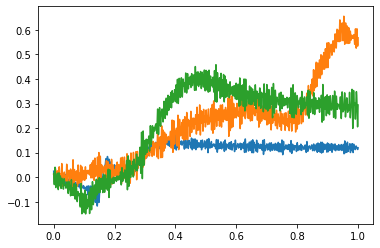

In [13]:
plt.plot(te,fbn[12])
plt.plot(te,fbn[30])
plt.plot(te,fbn[252])

In [14]:
np.linalg.norm(fbn[1]-fb[1])/np.linalg.norm(fb[1])

0.09998660601076174

In [15]:
np.sqrt(20000)

141.4213562373095

In [16]:
tr = np.linspace(0,1,500)

In [17]:
folder = './Redaction/data'
Export_Data(t,fl[12],folder,'l_eig_0')
Export_Data(t,fl[30],folder,'l_eig_1')
Export_Data(t,fl[252],folder,'l_eig_2')

In [18]:
folder = './Redaction/data'
Export_Data(tr,reduce(fle[12]),folder,'l_elt_0')
Export_Data(tr,reduce(fle[30]),folder,'l_elt_1')
Export_Data(tr,reduce(fle[252]),folder,'l_elt_2')

In [19]:
folder = './Redaction/data'
Export_Data(tr,reduce(fb[12]),folder,'b5_elt_0')
Export_Data(tr,reduce(fb[30]),folder,'b5_elt_1')
Export_Data(tr,reduce(fb[252]),folder,'b5_elt_2')

In [20]:
folder = './Redaction/data'
Export_Data(tr,reduce(fbn[12]),folder,'bn5_elt_0')
Export_Data(tr,reduce(fbn[30]),folder,'bn5_elt_1')
Export_Data(tr,reduce(fbn[252]),folder,'bn5_elt_2')